In [1]:
!pip3 install pandas
!pip3 install scipy

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy


In [3]:
basePath = os.path.dirname(os.path.abspath("__file__"))
print(basePath)
df = pd.read_json (basePath + '/gazefollower_calibration_data.json')

/Users/lelele/Documents/Praca Mgr/GazeFollowerTestDataAnalysys/30-dark-noglasses


<AxesSubplot:xlabel='testPointX', ylabel='testPointY'>

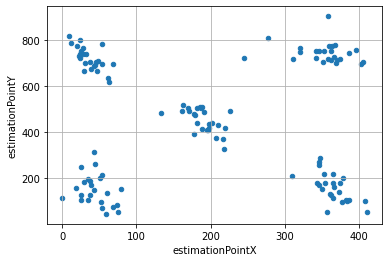

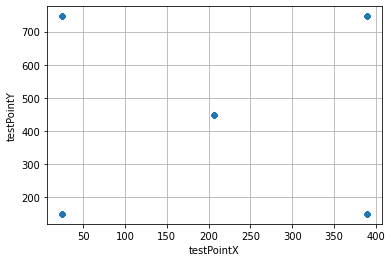

In [4]:
df.plot.scatter(x="estimationPointX", y="estimationPointY", grid=True)
df.plot.scatter(x="testPointX", y="testPointY", grid=True)



In [5]:
ppi = 326
avarageElapsedTimeForSteps = df.groupby('calibrationStep')['elapsedTime'].mean()
entireElapsedTime = df.groupby('calibrationStep')['elapsedTime'].sum()
avarageDistance = df['distanceFromDevice'].mean()

from scipy.spatial import distance
avarageEstimatedPointX = df.groupby('calibrationStep')['estimationPointX'].mean()
avarageEstimatedPointY = df.groupby('calibrationStep')['estimationPointY'].mean()

testPointX =  df.groupby('calibrationStep')['testPointX'].mean()
testPointY =  df.groupby('calibrationStep')['testPointY'].mean()

xt = testPointX.to_list()
yt = testPointY.to_list()
xa = avarageEstimatedPointX.to_list()
ya = avarageEstimatedPointY.to_list()

pointErrors = []
mmErrors = []
steps = []
for index in range(len(xt)):
    dist =  distance.euclidean([xt[index], yt[index]], [xa[index], ya[index]])
    a = dist * 2
    ErrorInMM = a * (2.54 / ppi) * 10
    pointErrors.append(str(round(dist,3)))
    mmErrors.append(str(round(ErrorInMM,3)))
    steps.append(str(index + 1))
dict = {'Step': steps, 'Error (mm)': mmErrors, 'Error (points)': pointErrors, 'Avarage elapsed time': avarageElapsedTimeForSteps, 'Elapsed time for calibration(s)': entireElapsedTime, 'Avarage distance (cm)': round(avarageDistance)}
df2 = pd.DataFrame(dict)

quality = 'low' if df['depthDataQuality'][0] == 0 else' high' 
accuracy = 'relative' if df['depthDataAccuracy'][0] == 0 else 'absolute'
print(df2)
print('Calibration took: ' + str(round(entireElapsedTime.sum() / 60,2)) + ' minutes')
print('Depth data quality: ' + quality)
print('Depth data accuracy: ' + accuracy)
print('Depth data filtered: ' + str(df['isDepthDataFiltered'][0]))
print('Number of steps: ', df.shape[0])
index = df2.index
row1 = df2['Error (mm)'] == df2['Error (mm)'].max()
bestRow = index[row1][0]
row2 =  df2['Error (mm)'] == df2['Error (mm)'].min()
worstRow = index[row2][0]
df2['Error (mm)'] = pd.to_numeric(df2['Error (mm)'], downcast="float")
mean = df2['Error (mm)'].mean()
print('\n& {} & {} & {} & {}'.format(mean, bestRow, worstRow, round(entireElapsedTime.sum() / 60,2)))


                Step Error (mm) Error (points)  Avarage elapsed time  \
calibrationStep                                                        
1                  1      4.454         28.583              5.006097   
2                  2      4.576         29.363              2.494401   
3                  3      5.711          36.65              3.962376   
4                  4      4.108          26.36              3.837424   
5                  5       2.69         17.261              2.364073   

                 Elapsed time for calibration(s)  Avarage distance (cm)  
calibrationStep                                                          
1                                     125.152429                     32  
2                                      62.360019                     32  
3                                      99.059400                     32  
4                                      95.935611                     32  
5                                      59.101823   